In [3]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import Image, display, HTML

print(pd.__version__)
print(cv.__version__)

2.1.0
4.8.0


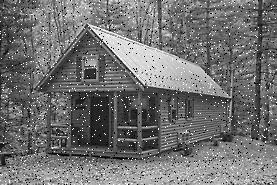

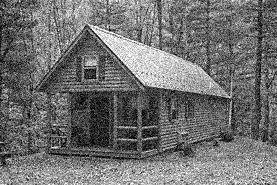

In [5]:
# image1 = cv.imread("./assignment3/original_image/noisy_img1.jpg")
# gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)

# image2 = cv.imread("./assignment3/original_image/noisy_img2.jpg")
# gray_image2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

display(HTML('<h3>Original image</h3>'))
display(Image(filename='./original_image/noisy_img1.jpg'))
display(HTML('<h3>Original image</h3>'))
display(Image(filename='./original_image/noisy_img2.jpg'))

### Smoothing filters

In [63]:
# def medianFilter(image, image_name, kernel_size):

#     # Apply the averaging filter using cv2.blur()
#     filtered_image = cv.medianBlur(image, kernel_size)
    
#     cv.imwrite(f'./edited_image/{image_name}_averaging_built-in.jpg', filtered_image)
    
def averagingFilter(image, image_name, kernel_size):
    
    img = image.copy()
    w = img.shape[1]
    h = img.shape[0]
    dist_from_border = ((kernel_size+1) // 2) -1
    
    # dist_from_border, h-dist_from_border-1
    # dist_from_border, w-dist_from_border-1
    for i in range(h):
        for j in range(w):
            sum = 0
            # for k in range(i, i+kernel_size):
            #     for l in range(j, j+kernel_size):
            #         print(k, l)
            #         sum += image[k, l]
            # img[i, j] = sum/(kernel_size*kernel_size)
            for m in range(- (kernel_size//2), kernel_size // 2 + 1):
                for n in range(- (kernel_size//2), kernel_size // 2 + 1):
                    
                    # Wrapping image to the other size if out of bound
                    row = (i + m) % image.shape[0]
                    col = (j + n) % image.shape[1]
                    sum += image[row, col]
                    
            img[i, j] = sum / (kernel_size*kernel_size)
    # img = np.divide(image, 9).astype(np.uint8)
    cv.imwrite(f'./edited_image/{image_name}_averaging.jpg', img)

def medianFilter(image, image_name, kernel_size):
    
    img = image.copy()
    w = img.shape[1]
    h = img.shape[0]
    dist_from_border = ((kernel_size+1) // 2) -1
    
    for i in range(h):
        for j in range(w):
            array = np.array([])
            for m in range(- (kernel_size//2), kernel_size // 2 + 1):
                for n in range(- (kernel_size//2), kernel_size // 2 + 1):
                    
                    # Wrapping image to the other size if out of bound
                    row = (i + m) % image.shape[0]
                    col = (j + n) % image.shape[1]
                    array = np.append(array, image[row, col])
                    
                    
            img[i, j] = np.median(array)
   
    cv.imwrite(f'./edited_image/{image_name}_median.jpg', img)


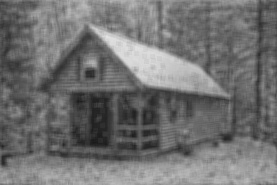

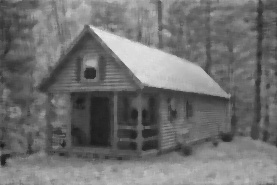

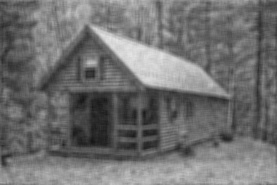

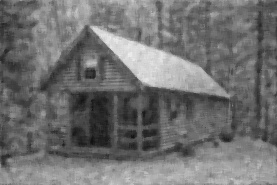

In [66]:
image1 = cv.imread("./original_image/noisy_img1.jpg")
gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
image2 = cv.imread("./original_image/noisy_img2.jpg")
gray_image2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

averagingFilter(gray_image1, "noisy_img1", 5)
averagingFilter(gray_image2, "noisy_img2", 5)
medianFilter(gray_image1, "noisy_img1", 5)
medianFilter(gray_image2, "noisy_img2", 5)

display(HTML('<h3>Averaging filter image1</h3>'))
display(Image(filename=f'./edited_image/noisy_img1_averaging.jpg'))

display(HTML('<h3>Median filter image1</h3>'))
display(Image(filename=f'./edited_image/noisy_img1_median.jpg'))

display(HTML('<h3>Averaging filter image2</h3>'))
display(Image(filename=f'./edited_image/noisy_img2_averaging.jpg'))

display(HTML('<h3>Median filter image2</h3>'))
display(Image(filename=f'./edited_image/noisy_img2_median.jpg'))

> จะเห็นได้ชัดเจนว่าการใช้ median filter กับภาพที่ 1 ทำให้ผลลัพธ์ที่ได้มีความเบลอน้อยกว่าการใช้ averaging filter พอสมควร
เพราะว่า median filter จะจัดการกับ salt and pepper noise ได้ดีกว่า
แต่ในภาพที่ 2 averaging filter ให้ผลลัพธ์ที่ดีกว่าเล็กน้อย ภาพที่ได้ไม่สูญเสียรายละเอียดไปมากเท่ากับภาพที่ใช้ median filter
อาจเป็นเพราะว่าทั้ง 2 วิธีนี้ไม่เหมาะกับ noise ประเภทนี้จึงได้ผลลัพธ์ไม่ค่อยดีเท่าไหร่ อาจต้องใช้วิธีการอื่นๆแทน

### Sharpening filters

In [16]:
# def laplacianFilter(image, image_name):
#     # Apply the Laplacian filter using cv2.Laplacian()
#     filtered_image = cv.Laplacian(image, cv.CV_64F)

#     # Convert the result back to an 8-bit image
#     filtered_image = cv.convertScaleAbs(filtered_image)
    
#     # return_image = image + filtered_image
    
#     cv.imwrite(f'./edited_image/{image_name}_laplacian.jpg', filtered_image)

def convolution(image, kernel):
    return cv.filter2D(image, -1, kernel)

def laplacianFilter(image, image_name):
    laplacian = np.zeros_like(image)
    kernel = np.array([ [0, 1, 0], [1, -4, 1], [0, 1, 0]])   
    
    # apply kernel to overall image
    laplacian = convolution(image, kernel)
    cv.imwrite(f'./edited_image/{image_name}_laplacian.jpg', laplacian)
    
    return laplacian

def diagonalLaplacianFilter(image, image_name):
    laplacian = np.zeros_like(image)
    kernel = np.array([ [1, 1, 1], [1, -8, 1], [1, 1, 1]])
    
    # apply kernel to overall image
    laplacian = convolution(image, kernel)
    cv.imwrite(f'./edited_image/{image_name}_diagonal_laplacian.jpg', laplacian)
    
    return laplacian

In [49]:
def robertGradient(image, image_name):
    gradient = np.zeros_like(image)
    
    # Define the Roberts Cross kernels
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])

    # Apply the Roberts Cross operator using cv2.filter2D
    gradient_x = convolution(image, kernel_x)
    gradient_y = convolution(image, kernel_y)
    
    gradient = np.sqrt(gradient_x**2 + gradient_y**2)
    cv.imwrite(f'./edited_image/{image_name}_robert_gradient.jpg', gradient)
    
    return gradient

def sobelGradient(image, image_name):
    gradient = np.zeros_like(image)
    
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    gradient_x = convolution(image, kernel_x)
    gradient_y = convolution(image, kernel_y)
    
    gradient = np.sqrt(gradient_x**2 + gradient_y**2)
    cv.imwrite(f'./edited_image/{image_name}_sobel_gradient.jpg', gradient)
    
    return gradient

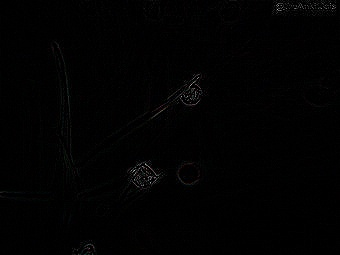

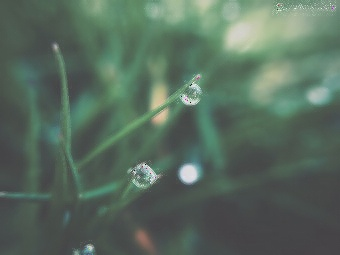

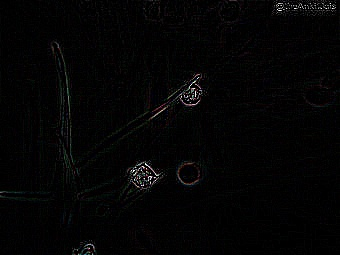

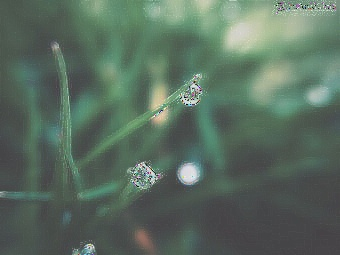

In [18]:
image = cv.imread("./original_image/blurred_image.jpg")

laplacian = laplacianFilter(image, "blurred_image")
laplacian_filtered_image = image + laplacian
cv.imwrite('./edited_image/blurred_image_filtered_laplacian.jpg', laplacian_filtered_image)

diagonal_laplacian = diagonalLaplacianFilter(image, "blurred_image")
diagonal_laplacian_filtered_image = image + diagonal_laplacian
cv.imwrite('./edited_image/blurred_image_filtered_diagonal_laplacian.jpg', diagonal_laplacian_filtered_image)

display(HTML('<h3>Laplacian</h3>'))
display(Image(filename='./edited_image/blurred_image_laplacian.jpg'))

display(HTML('<h3>Laplacian filtered image</h3>'))
display(Image(filename='./edited_image/blurred_image_filtered_laplacian.jpg'))

display(HTML('<h3>Diagonal Laplacian</h3>'))
display(Image(filename='./edited_image/blurred_image_diagonal_laplacian.jpg'))

display(HTML('<h3>Diagonal Laplacian filtered image</h3>'))
display(Image(filename='./edited_image/blurred_image_filtered_diagonal_laplacian.jpg'))


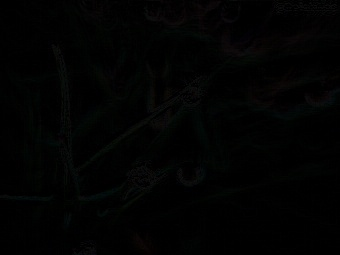

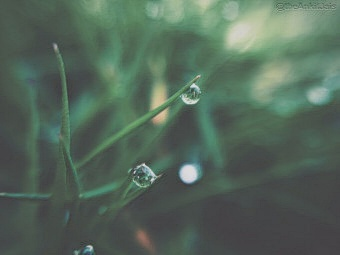

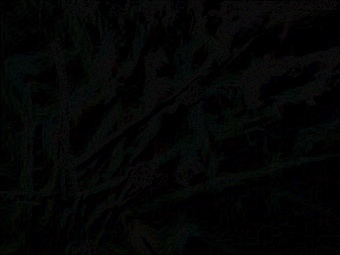

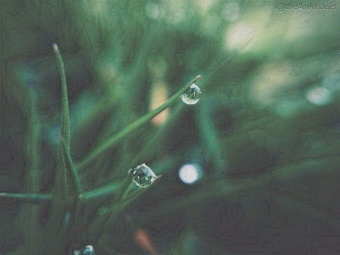

In [51]:
robert_gradient = robertGradient(image, "blurred_image")
robert_filtered_image = image - robert_gradient
cv.imwrite('./edited_image/blurred_image_filtered_robert_gradient.jpg', robert_filtered_image)

sobel_gradient = sobelGradient(image, "blurred_image")
sobel_filtered_image = image - sobel_gradient
cv.imwrite('./edited_image/blurred_image_filtered_sobel_gradient.jpg', sobel_filtered_image)

display(HTML('<h3>Robert Gradient</h3>'))
display(Image(filename='./edited_image/blurred_image_robert_gradient.jpg'))

display(HTML('<h3>Robert filtered image</h3>'))
display(Image(filename='./edited_image/blurred_image_filtered_robert_gradient.jpg'))

display(HTML('<h3>Sobel Gradient</h3>'))
display(Image(filename='./edited_image/blurred_image_sobel_gradient.jpg'))

display(HTML('<h3>Sobel filtered image</h3>'))
display(Image(filename='./edited_image/blurred_image_filtered_sobel_gradient.jpg'))

> จะสังเกตว่าเมื่อใช้ Laplacian จะทำให้ส่วนที่มีรายละเอียดสูงถูกไฮไลท์ซึ่งในรูปนี้ก็คือ บริเวณก้านใบและหยดน้ำ แล้วจะเห็นได้ชัดเจนว่าเมื่อใช้ diagonal laplacian จะทำให้รายละเอีบดถูกไฮไลท์เพิ่มขึ้นกว่าเดิม รวมถึงส่วนลายน้ำมุมขวาบนด้วย
> เมื่อนำ Laplacian filter มารวมกับภาพต้นฉบับก็จะได้รายละเอียดที่ชัดเจนมากขึ้นกว่าเดิมไปอีกแต่ภาพดูไม่สมูธมากอาจจะเพราะว่ามีวิธีการที่เหมาะสมมากกว่า Laplacian

> จะสังเกตว่า Robert ให้ผลลัพธ์ที่ดีกว่า Sobel สังเกตได้จากบริเวณหยดน้ำและก้านใบที่มีความชัดเจนกว่า

> จาก Sharpening filter จะเห็นว่าสำหรับรูปนี้ Gradient จะใช้ได้ดีกว่า เพราะว่า Laplacian จะทำให้ภาพใหม่เกิด noise มากกว่า